In [138]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams


rcParams["font.family"] = "Yu Mincho"
# import matplotlib.font_manager
# print([f.name for f in matplotlib.font_manager.fontManager.ttflist])


In [139]:
def violinplot(d, name="data", width=0.5):

    # # variables for plot
    # episodes = []
    # rewards = []
    # num_failures = []
    # for i in range(num_episodes_in_eval):
    #     episodes.append(i + 1)
    # for i in range(num_episodes_in_eval):
    #     rewards.append(r[i][0])
    #     num_failures.append(len(r[i][1])) if len(r[i][1]) <= 4 else num_failures.append(4)  # regard more than 4 as 4
    mean = sum(d["rewards"]) / len(d["rewards"])

    # # scatter diagram with colorbar
    # plt.scatter(episodes, rewards, c=num_failures, cmap="binary", lw=0.5, edgecolors="k", vmin=0, vmax=4)
    # plt.hlines(mean, 0, num_episodes_in_eval, colors="r", label=f"mean = {mean}")
    # plt.legend()
    # plt.colorbar(label="num_failures")
    # plt.xlim(0, num_episodes_in_eval)
    # plt.ylim(-100, 1300)
    # plt.xlabel("episode")
    # plt.ylabel("reward")
    # filename = os.path.join(graph_dirname, f"scatter_diagram_with_colorbar_{num_episodes_in_eval}_episodes_#{params_filename}#.png")
    # plt.savefig(filename)
    # plt.close()

    # # scatter diagram
    # plt.scatter(episodes, rewards)
    # plt.hlines(mean, 0, num_episodes_in_eval, colors="r", label=f"mean = {mean}")
    # plt.legend()
    # plt.xlim(0, num_episodes_in_eval)
    # plt.ylim(-100, 1300)
    # plt.xlabel("episode")
    # plt.ylabel("reward")
    # filename = os.path.join(graph_dirname, f"scatter_diagram_{num_episodes_in_eval}_episodes_#{params_filename}#.png")
    # plt.savefig(filename)
    # plt.close()

    # # histogram
    # plt.hist(rewards, range=(-100, 1300), rwidth=0.9, bins=28, orientation="horizontal")
    # plt.hlines(mean, 0, num_episodes_in_eval * 0.3, colors="r", label=f"mean = {mean}")
    # plt.legend()
    # plt.xlim(0, num_episodes_in_eval * 0.3)
    # plt.ylim(-100, 1300)
    # plt.ylabel("reward")
    # filename = os.path.join(graph_dirname, f"histogram_{num_episodes_in_eval}_episodes_#{params_filename}#.png")
    # plt.savefig(filename)
    # plt.close()

    # violinplot
    fig=plt.figure(figsize=(12, 10), dpi= 80, facecolor="w", edgecolor="k")
    # if title is not None:
    #     fig.suptitle(title)
    ax = fig.add_subplot(111)
    plt.rcParams["font.size"] = 28
    ax.violinplot(d["rewards"], widths=width, showmeans=True)
    ax.text(1, 1050, f"平均値：{mean:.2f}", ha="center")
    ax.set_xlim(0.375, 1.625)
    ax.set_xticks([1])
    ax.set_xticklabels([name])
    ax.set_ylim(-200, 1000)
    ax.set_ylabel("累積報酬")
    # filename = os.path.join(graph_dirname, f" violinplot_{num_episodes_in_eval}_episodes_#{params_filename}#.png")
    # plt.savefig(filename)
    # plt.close()

In [140]:
def violinplots(ds, names, widths):
    fig=plt.figure(figsize=(24, 10), dpi= 80, facecolor="w", edgecolor="k")
    ax = fig.add_subplot(1, 1, 1)
    plt.rcParams["font.size"] = 24
    ax.set_xlim(1-0.8, len(names)+0.8)
    ax.set_ylim(-200, 1200)
    plt.setp(ax, xticks=[i+1 for i in range(len(names))], xticklabels=names)
    # ax.set_xticks = [1, 2]
    # ax.set_xticklabels = ["故障なし", "故障あり"]
    # ax.set_xlabel("でーた")
    means = [sum(reward) / len(reward) for reward in ds]
    for i in range(len(ds)):
        # ax.text(0.5, 1100, "平均値", ha="right")
        ax.text(i+1, 1050, f"平均値: {means[i]:.2f}", ha="center")
    ax.violinplot(ds,widths=widths, showmeans=True)
    ax.set_ylabel("累積報酬")




In [141]:
def extract_data(result_list):
    episode = 1
    episodes = []
    rewards = []
    joint_ids = []
    num_failures = []

    for i in result_list:
        episodes.append(episode)
        episode += 1
        rewards.append(i[0])
        joint_ids.append(i[1])
        num_failures.append(len(i[1]))
    
    return{
        "episodes" : episodes,
        "rewards" : rewards,
        "joint_ids" : joint_ids,
        "num_failures" : num_failures
    }

    

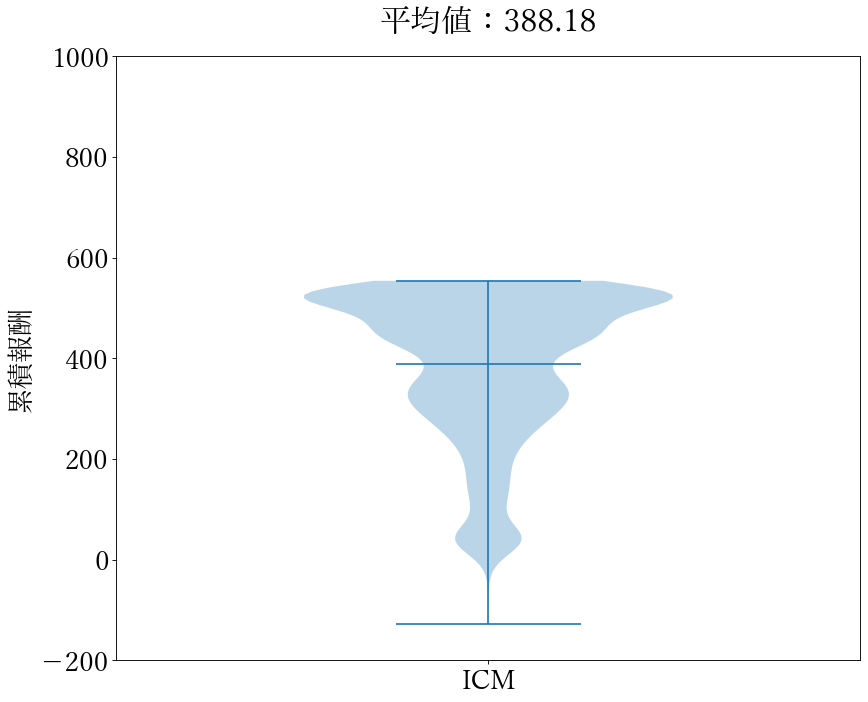

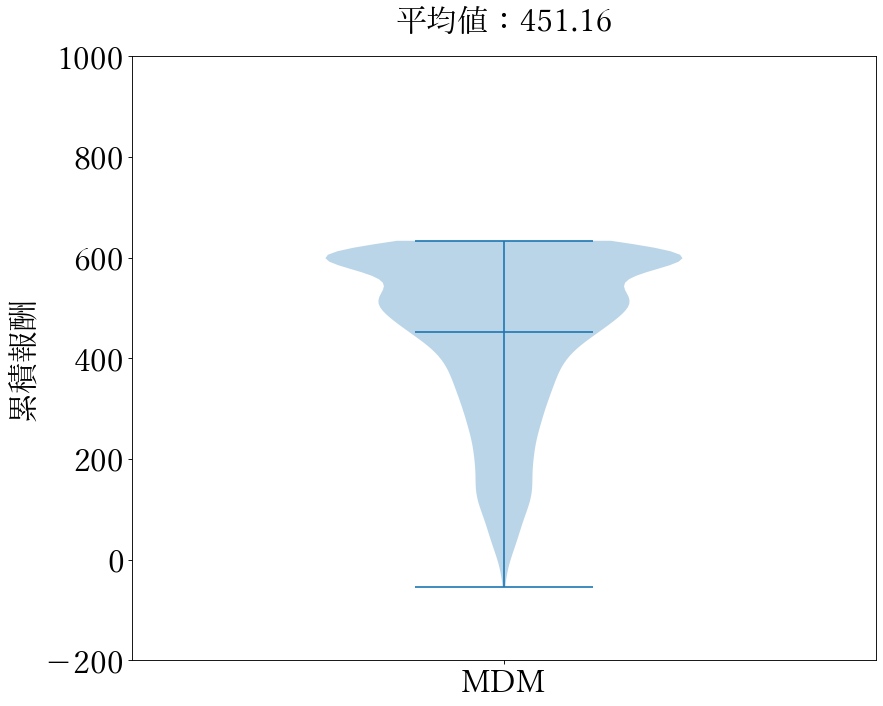

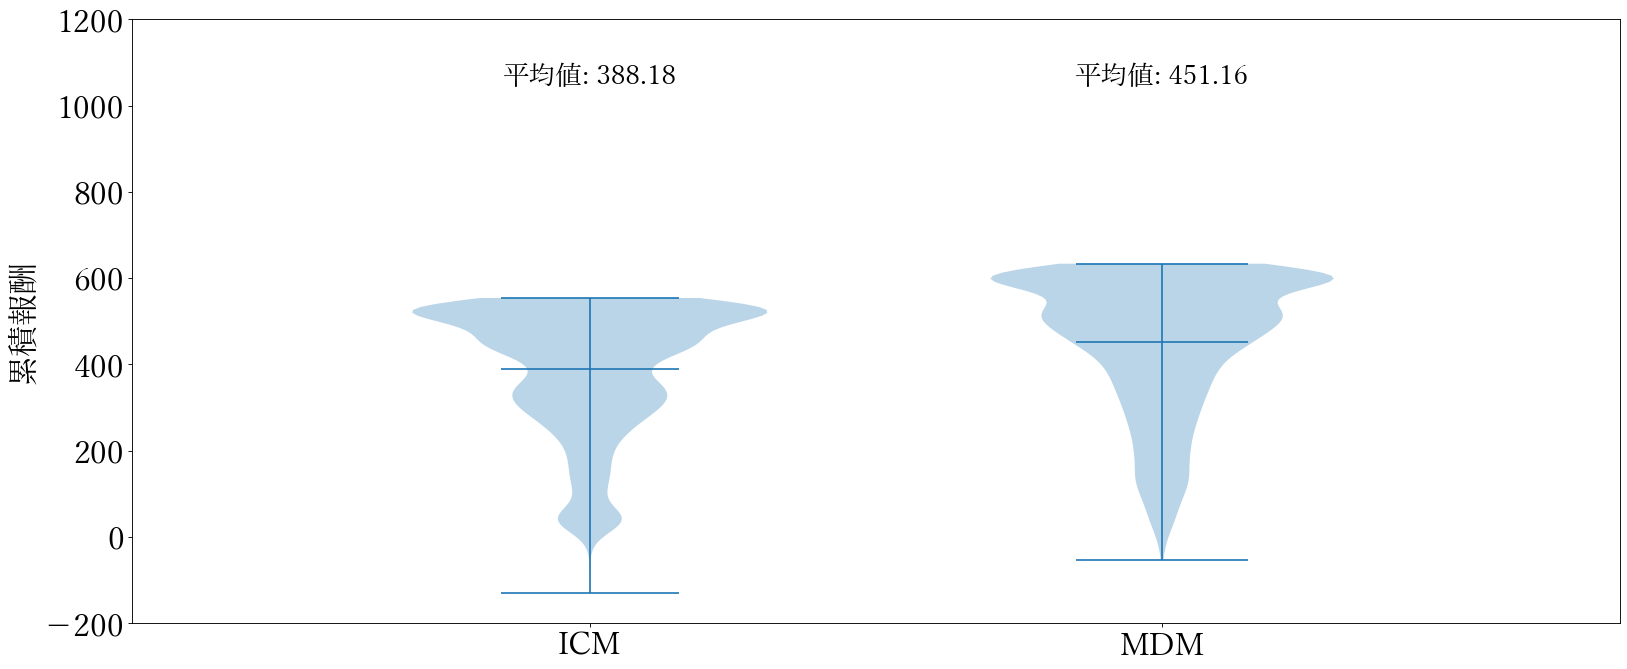

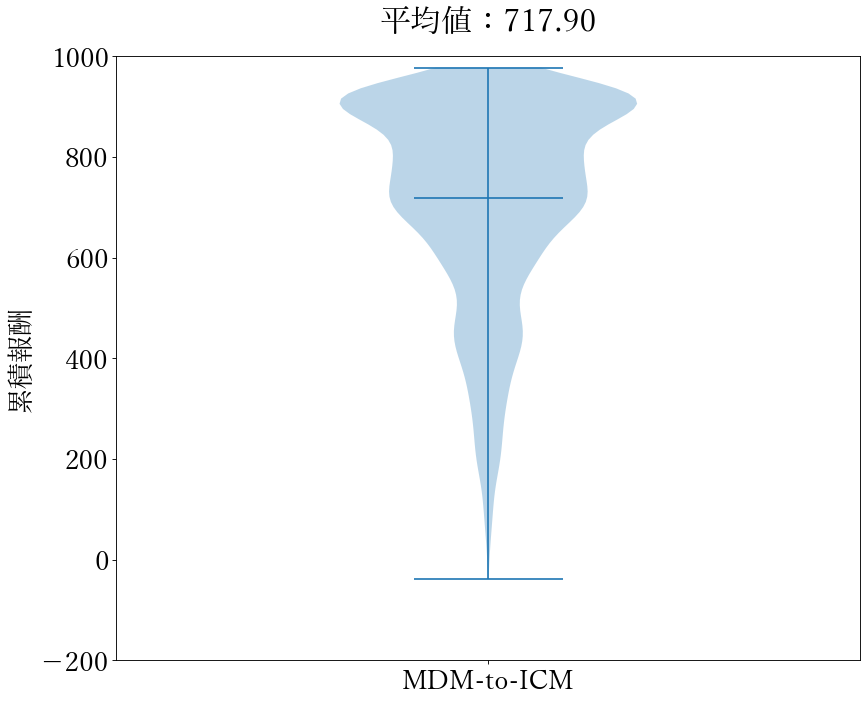

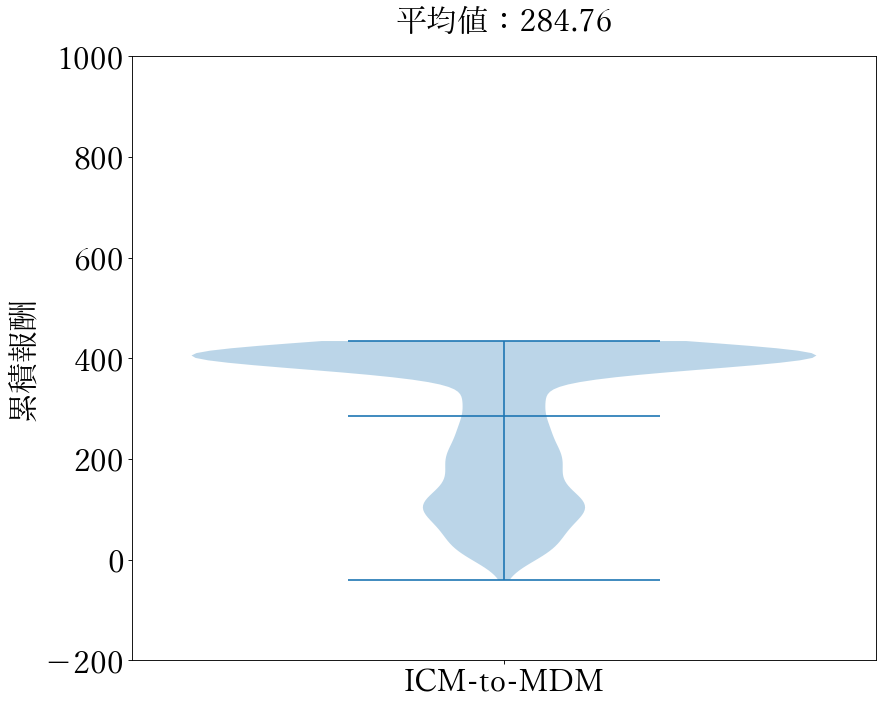

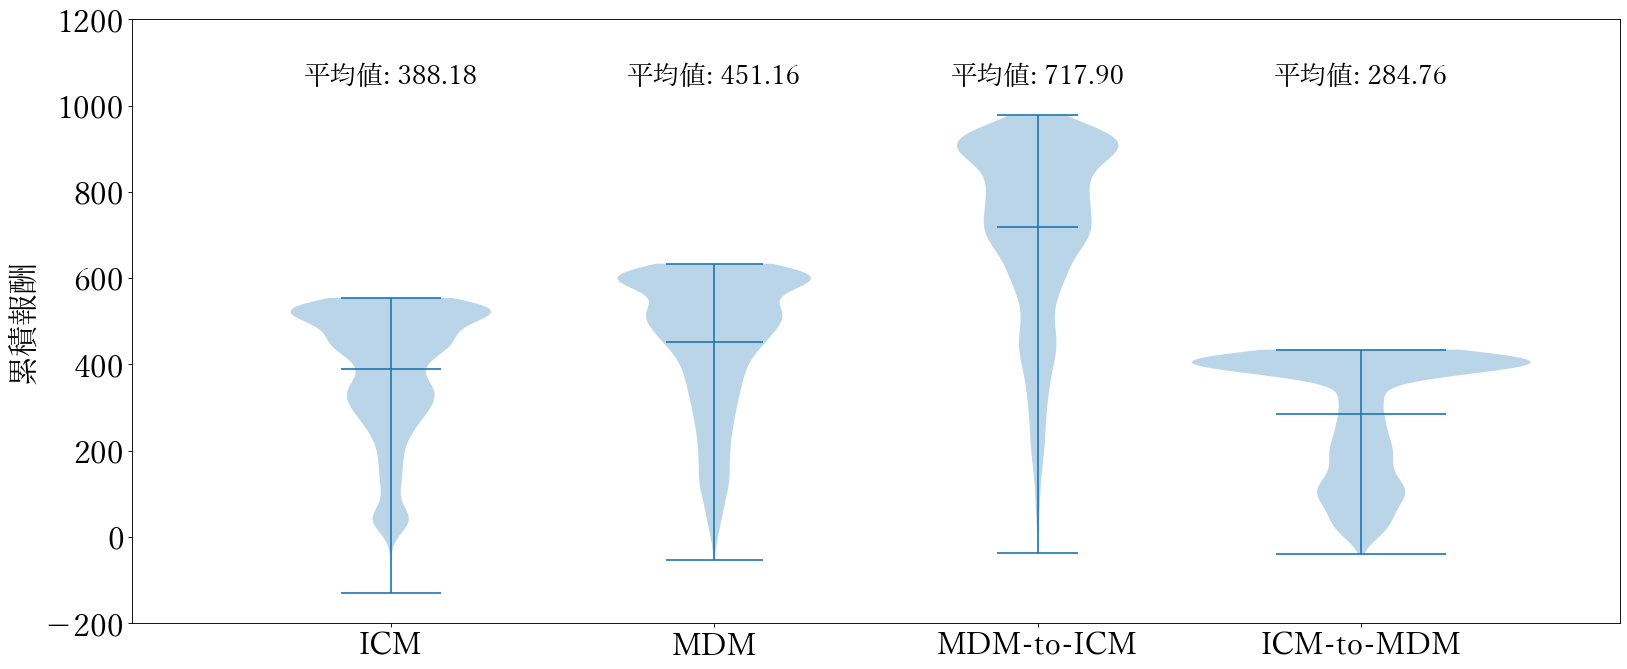

In [142]:
ds=[]
names = []
widths = []

simname = "thesis_data/fail/icm"
name = "ICM"
num_episodes_in_eval = 5000
width = 0.62
jsonname = f"rewards_and_joints_{num_episodes_in_eval}_episodes.json"

# Data collection
filename = os.path.join("log", simname, "result", jsonname)
with open(filename, "r") as f:
    d = extract_data(json.load(f))


ds.append(d["rewards"])
names.append(name)
widths.append(width)
violinplot(d, name, width)


simname = "thesis_data/fail/mdm"
name = "MDM"
num_episodes_in_eval = 5000
width = 0.6
jsonname = f"rewards_and_joints_{num_episodes_in_eval}_episodes.json"

# Data collection
filename = os.path.join("log", simname, "result", jsonname)
with open(filename, "r") as f:
    d = extract_data(json.load(f))

ds.append(d["rewards"])
names.append(name)
widths.append(width)
violinplot(d, name, width)


violinplots(ds, names, widths)

# ----------------------------------------------------------
# ds=[]
# names = []
# widths = []



simname = "thesis_data/fail/mdm_to_icm"
name = "MDM-to-ICM"
num_episodes_in_eval = 5000
width = 0.5
jsonname = f"rewards_and_joints_{num_episodes_in_eval}_episodes.json"

# Data collection
filename = os.path.join("log", simname, "result", jsonname)
with open(filename, "r") as f:
    d = extract_data(json.load(f))


ds.append(d["rewards"])
names.append(name)
widths.append(width)
violinplot(d, name, width)


simname = "thesis_data/fail/icm_to_mdm"
name = "ICM-to-MDM"
num_episodes_in_eval = 5000
width = 1.05
jsonname = f"rewards_and_joints_{num_episodes_in_eval}_episodes.json"

# Data collection
filename = os.path.join("log", simname, "result", jsonname)
with open(filename, "r") as f:
    d = extract_data(json.load(f))

ds.append(d["rewards"])
names.append(name)
widths.append(width)
violinplot(d, name, width)

# ----------------------------------------------------------
# simname = "thesis_mdm_icm"
# name = "ICM(故障ありで9000世代学習)"
# num_episodes_in_eval = 5000
# jsonname = f"rewards_and_joints_{num_episodes_in_eval}_episodes.json"

# # Data collection
# filename = os.path.join("log", simname, "result", jsonname)
# with open(filename, "r") as f:
#     d = extract_data(json.load(f))

# ds.append(d["rewards"])
# names.append(name)
# violinplot(d, name)

violinplots(ds, names, widths)